# Machine Learning - Homework 4
## Mohammad Bahrami - 9724133

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Question 1

### Data Preparation

In [2]:
dataset = pd.read_csv('ML_HW4/Q1.csv', header=None, names=['oral', 'written', 'ispassed'])

### Part A

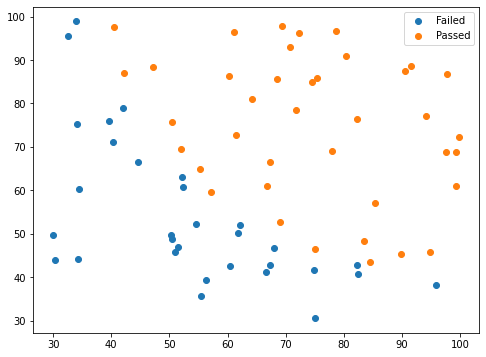

In [22]:
test_portion = 0.3
test_set = dataset.sample(int(dataset.shape[0] * test_portion))
train_set = dataset.drop(test_set.index)
fig, ax = plt.subplots()
ax.scatter(train_set.loc[train_set['ispassed']==0, 'oral'], train_set.loc[train_set['ispassed']==0, 'written'], label='Failed')
ax.scatter(train_set.loc[train_set['ispassed']==1, 'oral'], train_set.loc[train_set['ispassed']==1, 'written'], label= 'Passed')
ax.legend()
fig.set_size_inches((8, 6))

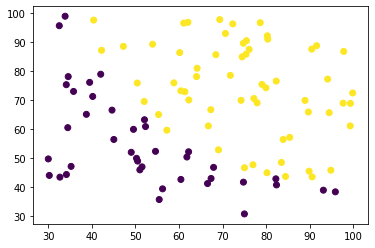

In [41]:
plt.scatter(dataset['oral'], dataset['written'], c=dataset['ispassed'])

### Part B

In [23]:
lg_reg = LogisticRegression(penalty='none')
lg_reg.fit(train_set[['oral', 'written']], train_set['ispassed'])
train_acc = lg_reg.score(train_set[['oral', 'written']], train_set['ispassed'])
test_acc = lg_reg.score(test_set[['oral', 'written']], test_set['ispassed'])

print(f'Train Accuracy: {train_acc*100: .2f}')
print(f'Test Accuracy: {test_acc*100: .2f}')

Train Accuracy:  85.71
Test Accuracy:  96.67


In [21]:
(lg_reg.predict(train_set[['oral', 'written']]) == train_set['ispassed']).sum() / train_set.shape[0]

0.9

### Part C

In [32]:
lr_weights = np.concatenate((lg_reg.intercept_, lg_reg.coef_.flatten()))
dboundary_x = np.array([test_set['oral'].min() - 5, test_set['oral'].max() + 5])
dboundary_y = -(dboundary_x * lr_weights[1] + lr_weights[0]) / lr_weights[2]

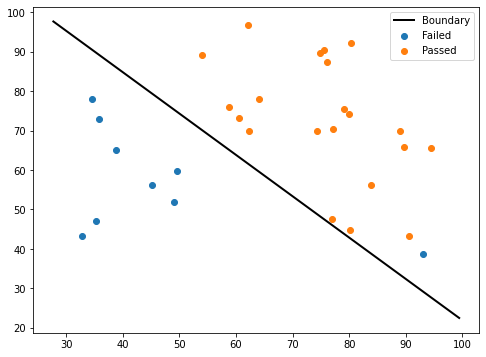

In [35]:
fig, ax = plt.subplots()
ax.plot(dboundary_x, dboundary_y, label='Boundary', linewidth=2, c='k')
ax.scatter(test_set.loc[test_set['ispassed']==0, 'oral'], test_set.loc[test_set['ispassed']==0, 'written'], label='Failed')
ax.scatter(test_set.loc[test_set['ispassed']==1, 'oral'], test_set.loc[test_set['ispassed']==1, 'written'], label= 'Passed')
ax.legend()
fig.set_size_inches((8, 6))

## Question 2

### Data Preparation

In [42]:
dataset = pd.read_csv('ML_HW4/Q2.csv', header=None, names=['x1', 'x2', 'ispassed'])

### Part A

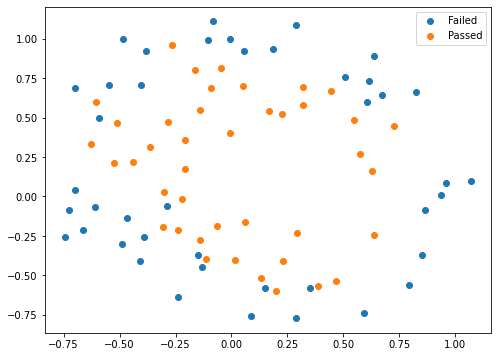

In [46]:
test_portion = 0.3
test_set = dataset.sample(int(dataset.shape[0] * test_portion))
train_set = dataset.drop(test_set.index)
fig, ax = plt.subplots()
ax.scatter(train_set.loc[train_set['ispassed']==0, 'x1'], train_set.loc[train_set['ispassed']==0, 'x2'], label='Failed')
ax.scatter(train_set.loc[train_set['ispassed']==1, 'x1'], train_set.loc[train_set['ispassed']==1, 'x2'], label= 'Passed')
ax.legend()
fig.set_size_inches((8, 6))

### Part B

In [48]:
max_degree = 4
for i in range(max_degree + 1):
    for j in range(max_degree + 1):
        if i + j <= 1: continue
        dataset[f'x1^{i}.x2^{j}'] = dataset['x1']**i * dataset['x2']**j
train_set = dataset.loc[train_set.index, :]
test_set = dataset.loc[test_set.index, :]

In [50]:
lg_reg = LogisticRegression()
lg_reg.fit(train_set.loc[:, train_set.columns != 'ispassed'], train_set['ispassed'])
train_acc = lg_reg.score(train_set.loc[:, train_set.columns != 'ispassed'], train_set['ispassed'])
test_acc = lg_reg.score(test_set.loc[:, test_set.columns != 'ispassed'], test_set['ispassed'])

print(f'Train Accuracy: {train_acc*100: .2f}')
print(f'Test Accuracy: {test_acc*100: .2f}')


Train Accuracy:  84.34
Test Accuracy:  74.29


### Part C

In [51]:
regularization_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
train_acc_list = []
test_acc_list = []
for rg_val in regularization_values:
    lg_reg = LogisticRegression(C=rg_val)
    lg_reg.fit(train_set.loc[:, train_set.columns != 'ispassed'], train_set['ispassed'])
    train_acc = lg_reg.score(train_set.loc[:, train_set.columns != 'ispassed'], train_set['ispassed'])
    test_acc = lg_reg.score(test_set.loc[:, test_set.columns != 'ispassed'], test_set['ispassed'])
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    print(f'Inverse of Regularization Strength: {rg_val}')
    print(f'\tTrain Accuracy: {train_acc*100: .2f}')
    print(f'\tTest Accuracy: {test_acc*100: .2f}')
    print('='*60)

Inverse of Regularization Strength: 0.01
	Train Accuracy:  66.27
	Test Accuracy:  60.00
Inverse of Regularization Strength: 0.03
	Train Accuracy:  66.27
	Test Accuracy:  65.71
Inverse of Regularization Strength: 0.1
	Train Accuracy:  75.90
	Test Accuracy:  74.29
Inverse of Regularization Strength: 0.3
	Train Accuracy:  81.93
	Test Accuracy:  74.29
Inverse of Regularization Strength: 1
	Train Accuracy:  84.34
	Test Accuracy:  74.29
Inverse of Regularization Strength: 3
	Train Accuracy:  84.34
	Test Accuracy:  77.14
Inverse of Regularization Strength: 10
	Train Accuracy:  85.54
	Test Accuracy:  77.14
Inverse of Regularization Strength: 30
	Train Accuracy:  86.75
	Test Accuracy:  77.14


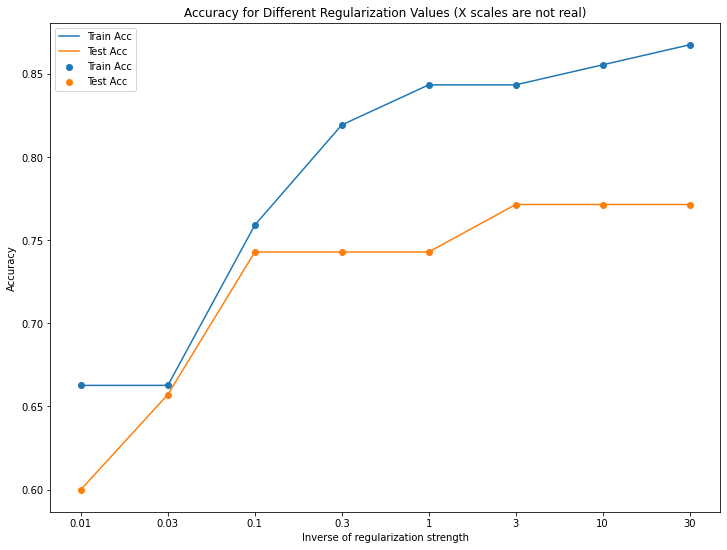

In [52]:
fig, ax = plt.subplots()
x = np.arange(len(regularization_values))
ax.plot(x, train_acc_list, label='Train Acc')
ax.plot(x, test_acc_list, label='Test Acc')
ax.scatter(x, train_acc_list, label='Train Acc')
ax.scatter(x, test_acc_list, label='Test Acc')
ax.set_xticks(x)
ax.set_xticklabels(regularization_values)
ax.set_title('Accuracy for Different Regularization Values (X scales are not real)')
ax.set_xlabel('Inverse of regularization strength')
ax.set_ylabel('Accuracy')
ax.legend()
fig.set_size_inches((12,9))

## Question 3

### Data Preparation

In [53]:
dataset_1 = pd.read_csv('ML_HW4/Q3_1.csv', header=None, names=['x1', 'x2', 'class'])
dataset_2 = pd.read_csv('ML_HW4/Q3_2.csv', header=None, names=['x1', 'x2', 'class'])
dataset_3 = pd.read_csv('ML_HW4/Q3_3.csv', header=None, names=['x1', 'x2', 'class'])

### Part A

In [55]:
svc = SVC(kernel='linear').fit(dataset_1[['x1', 'x2']], dataset_1['class'])
svc_weights = np.concatenate((svc.intercept_, svc.coef_.flatten()))
dboundary_x = np.array([dataset_1['x1'].min() - 0.2, dataset_1['x1'].max() + 0.2])
dboundary_y = -(dboundary_x * svc_weights[1] + svc_weights[0]) / svc_weights[2]
w_hat = svc.coef_[0] / np.linalg.norm(svc.coef_[0])
margin = 1 / np.linalg.norm(svc.coef_[0])
margin_above_xy = np.array(list(zip(dboundary_x, dboundary_y))) + w_hat * margin
margin_below_xy = np.array(list(zip(dboundary_x, dboundary_y))) - w_hat * margin

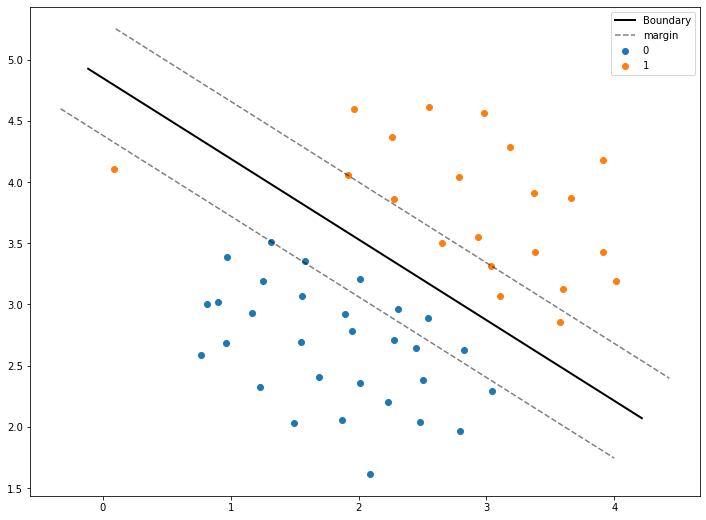

In [15]:
fig, ax = plt.subplots()
ax.plot(dboundary_x, dboundary_y,'k-', label='Boundary', linewidth=2)
ax.plot(margin_above_xy[:, 0], margin_above_xy[:, 1], 'k--', alpha=0.5, label='margin')
ax.plot(margin_below_xy[:, 0], margin_below_xy[:, 1], 'k--', alpha=0.5)
ax.scatter(dataset_1.loc[dataset_1['class']==0, 'x1'], dataset_1.loc[dataset_1['class']==0, 'x2'], label='0')
ax.scatter(dataset_1.loc[dataset_1['class']==1, 'x1'], dataset_1.loc[dataset_1['class']==1, 'x2'], label= '1')
ax.legend()
fig.set_size_inches((12, 9))

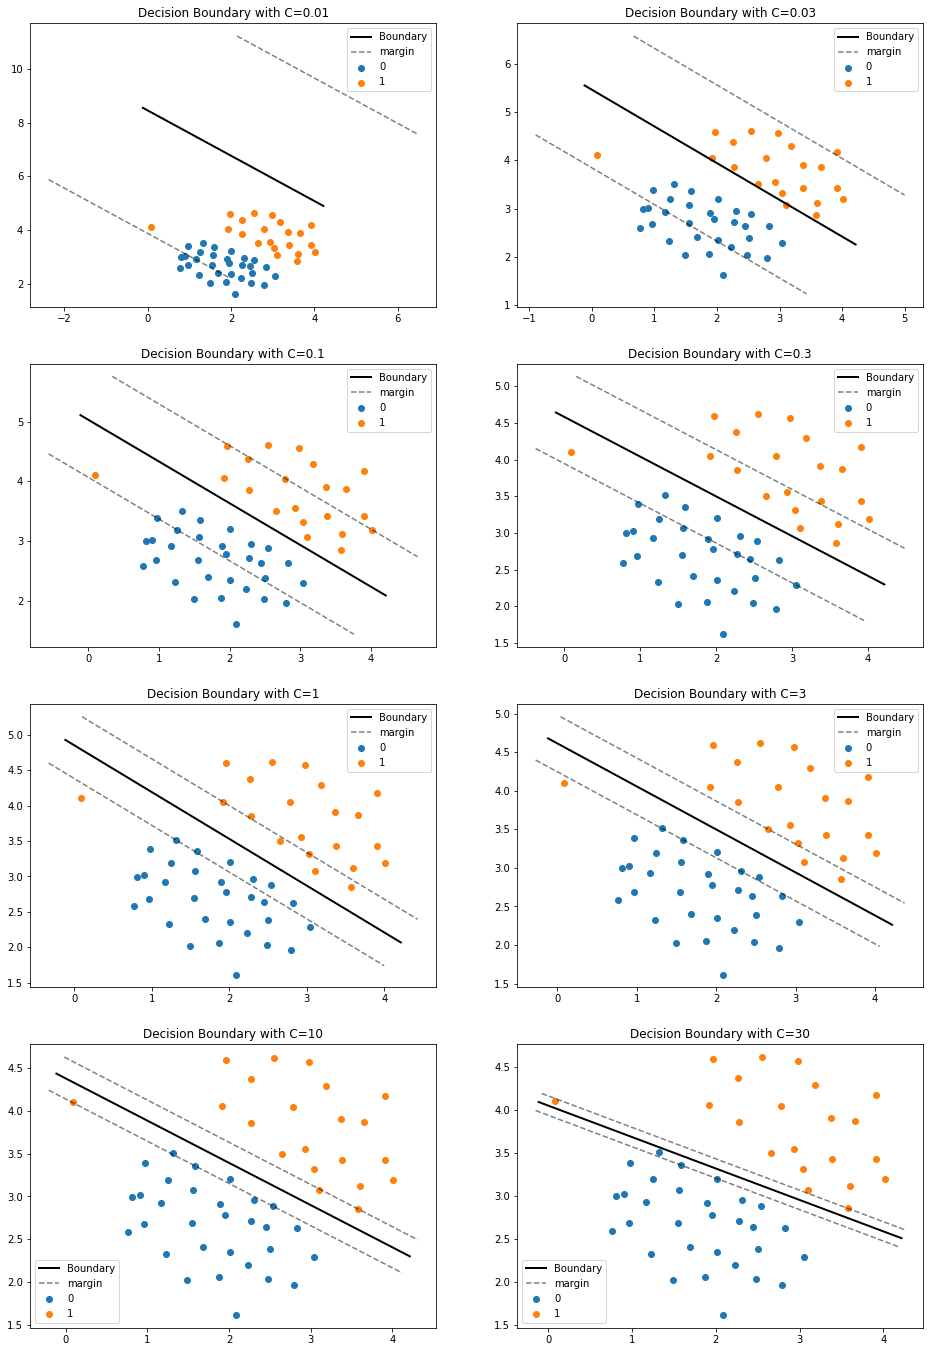

In [16]:
regularization_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
fig, axes = plt.subplots(len(regularization_values) // 2, 2, squeeze=False, figsize=(16, 6*len(regularization_values)//2))
for i, reg_val in enumerate(regularization_values):
    svc = SVC(kernel='linear', C=reg_val).fit(dataset_1[['x1', 'x2']], dataset_1['class'])
    svc_weights = np.concatenate((svc.intercept_, svc.coef_.flatten()))
    dboundary_x = np.array([dataset_1['x1'].min() - 0.2, dataset_1['x1'].max() + 0.2])
    dboundary_y = -(dboundary_x * svc_weights[1] + svc_weights[0]) / svc_weights[2]
    w_hat = svc.coef_[0] / np.linalg.norm(svc.coef_[0])
    margin = 1 / np.linalg.norm(svc.coef_[0])
    margin_above_xy = np.array(list(zip(dboundary_x, dboundary_y))) + w_hat * margin
    margin_below_xy = np.array(list(zip(dboundary_x, dboundary_y))) - w_hat * margin

    axes[i // 2][i % 2].plot(dboundary_x, dboundary_y,'k-', label='Boundary', linewidth=2)
    axes[i // 2][i % 2].plot(margin_above_xy[:, 0], margin_above_xy[:, 1], 'k--', alpha=0.5, label='margin')
    axes[i // 2][i % 2].plot(margin_below_xy[:, 0], margin_below_xy[:, 1], 'k--', alpha=0.5)
    axes[i // 2][i % 2].scatter(dataset_1.loc[dataset_1['class']==0, 'x1'], dataset_1.loc[dataset_1['class']==0, 'x2'], label='0')
    axes[i // 2][i % 2].scatter(dataset_1.loc[dataset_1['class']==1, 'x1'], dataset_1.loc[dataset_1['class']==1, 'x2'], label= '1')
    axes[i // 2][i % 2].legend()
    axes[i // 2][i % 2].set_title(f'Decision Boundary with C={reg_val}')

We can see that when regularization is too strong ($C = 0.01$), the model can't find a good decision boundary. As the regularization starts to get weaker, model starts to find decision boundaries with big margins, After reaching $C = 1,3$ model finds the optimal solution which is a good decision boundary with decent margins. Continuing to make the regularization weaker will result in decision boundaries with very small margins ($C = 30$), Which is not something we want in a SVM.

### Part B

In [80]:
svc = SVC(C=3).fit(dataset_2[['x1', 'x2']], dataset_2['class'])
meshx, meshy = np.meshgrid(
    np.arange(
        dataset_2['x1'].min() - 0.05,
        dataset_2['x1'].max() + 0.05,
        0.002
    ), 
    np.arange(
        dataset_2['x2'].min() - 0.05,
        dataset_2['x2'].max() + 0.05,
        0.002
    )
)
plot_pred = svc.decision_function(np.stack((meshx.flatten(), meshy.flatten())).T).reshape(meshx.shape)

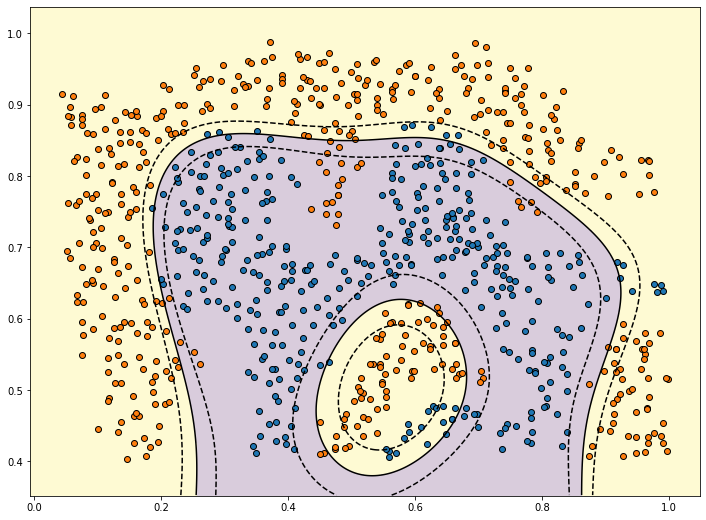

In [83]:
fig, ax = plt.subplots()

ax.pcolormesh(meshx, meshy, plot_pred > 0,shading='auto', alpha=0.2)
ax.contour(
	meshx, meshy, 
	plot_pred, colors=["k", "k", "k"],
	linestyles=["--", "-", "--"],
	levels=[-0.5, 0, 0.5]
)

ax.scatter(dataset_2.loc[dataset_2['class']==0, 'x1'], dataset_2.loc[dataset_2['class']==0, 'x2'], edgecolors='k', label='0')
ax.scatter(dataset_2.loc[dataset_2['class']==1, 'x1'], dataset_2.loc[dataset_2['class']==1, 'x2'], edgecolors='k', label= '1')
fig.set_size_inches((12, 9))

### Part C

In [84]:
test_portion = 0.3
test_set = dataset_3.sample(int(dataset_3.shape[0] * test_portion))
train_set = dataset_3.drop(test_set.index)
regularization_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
gamam_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]


max_score = 0
max_score_reg = 0
max_score_gamma = 0
for reg_val in regularization_values:
    for gamma in gamam_values:
        svc = SVC(C=reg_val, gamma=gamma).fit(train_set[['x1', 'x2']], train_set['class'])
        test_acc = svc.score(test_set[['x1', 'x2']], test_set['class'])
        if test_acc > max_score:
            max_score = test_acc
            max_score_reg = reg_val
            max_score_gamma = gamma
print(f'Best Accuracy: {max_score*100: .2f} Found at C: {max_score_reg} and Gamma: {max_score_gamma}')

Best Accuracy:  95.24 Found at C: 3 and Gamma: 30


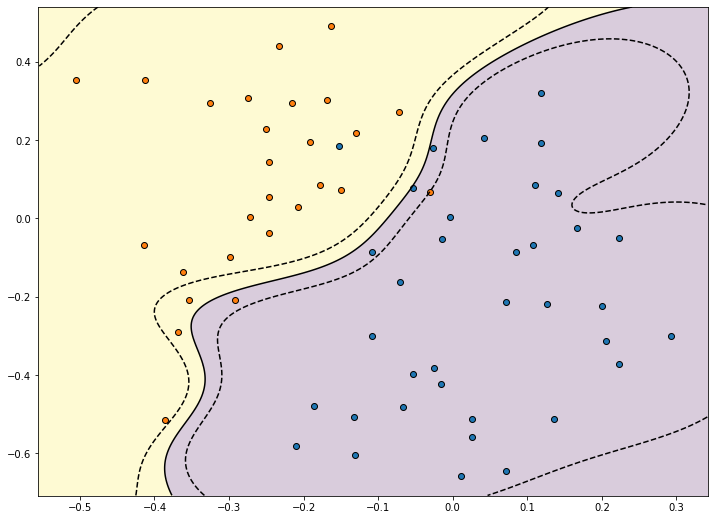

In [85]:
svc = SVC(C=max_score_reg, gamma=max_score_gamma).fit(train_set[['x1', 'x2']], train_set['class'])
meshx, meshy = np.meshgrid(
    np.arange(
        test_set['x1'].min() - 0.05,
        test_set['x1'].max() + 0.05,
        0.002
    ), 
    np.arange(
        test_set['x2'].min() - 0.05,
        test_set['x2'].max() + 0.05,
        0.002
    )
)
plot_pred = svc.decision_function(np.stack((meshx.flatten(), meshy.flatten())).T).reshape(meshx.shape)

fig, ax = plt.subplots()

ax.pcolormesh(meshx, meshy, plot_pred > 0, shading='auto', alpha=0.2)
ax.contour(
	meshx, meshy, 
	plot_pred, colors=["k", "k", "k"],
	linestyles=["--", "-", "--"],
	levels=[-0.5, 0, 0.5]
)

ax.scatter(test_set.loc[test_set['class']==0, 'x1'], test_set.loc[test_set['class']==0, 'x2'], edgecolors='k', label='0')
ax.scatter(test_set.loc[test_set['class']==1, 'x1'], test_set.loc[test_set['class']==1, 'x2'], edgecolors='k', label= '1')
fig.set_size_inches((12, 9))

## Question 4

### Data Prepration

In [86]:
dataset = pd.read_csv('ML_HW4/Q4.csv')

### Part A

In [87]:
test_portion = 0.3
test_set = dataset.sample(int(dataset.shape[0] * test_portion))
train_set = dataset.drop(test_set.index)

### Part B

In [88]:
knbc = KNeighborsClassifier().fit(train_set.iloc[:, :-1], train_set.iloc[:, -1])
test_acc = knbc.score(test_set.iloc[:, :-1], test_set.iloc[:, -1])
print(f'Default Setting Accuracy: {test_acc*100: .2f}')

Default Setting Accuracy:  95.56


### Part C

Best Test Accuracy: 1.0, Found at K: 4


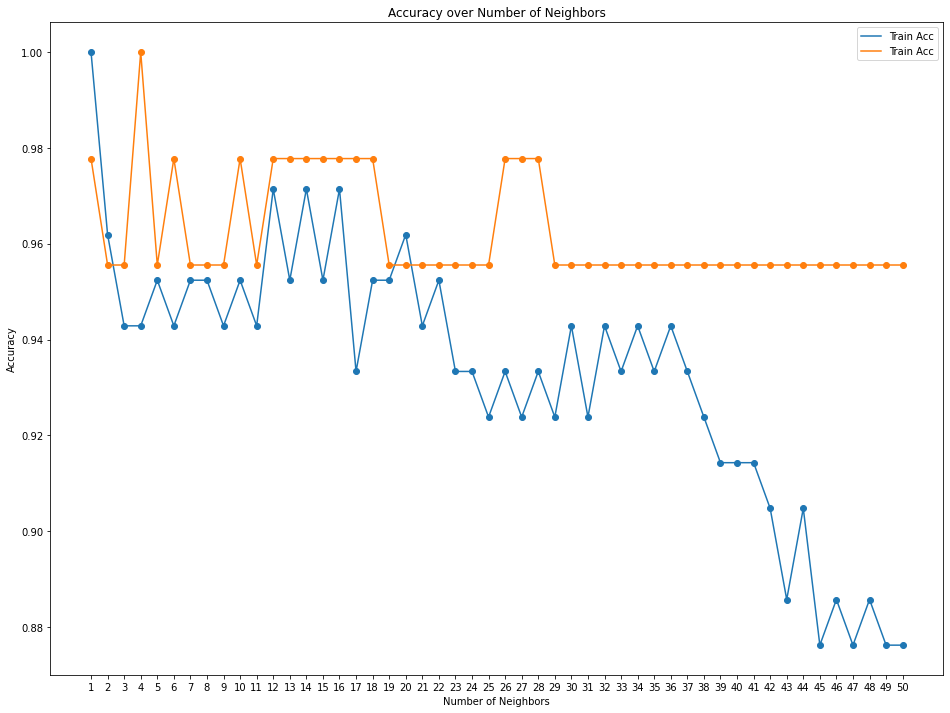

In [93]:
train_acc_list = []
test_acc_list = []

best_test_acc = 0
best_test_acc_k = 0

for k in range(1, 51):
    knbc = KNeighborsClassifier(n_neighbors=k).fit(train_set.iloc[:, :-1], train_set.iloc[:, -1])
    train_acc = knbc.score(train_set.iloc[:, :-1], train_set.iloc[:, -1])
    test_acc = knbc.score(test_set.iloc[:, :-1], test_set.iloc[:, -1])

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_test_acc_k = k
print(f'Best Test Accuracy: {best_test_acc}, Found at K: {best_test_acc_k}')


fig, ax = plt.subplots()
x = range(1, 51)
ax.plot(x, train_acc_list, label='Train Acc')
ax.plot(x, test_acc_list, label='Train Acc')
ax.scatter(x, train_acc_list)
ax.scatter(x, test_acc_list)
ax.set_xticks(x)
ax.set_title('Accuracy over Number of Neighbors')
ax.set_xlabel('Number of Neighbors')
ax.set_ylabel('Accuracy')
ax.legend()
# ax.set_ylim((0.8,1.02))
fig.set_size_inches((16, 12))
